<a href="https://colab.research.google.com/github/TrunnMosby/GSoC-RedHenLabs-Aztec-Glyph-Detection/blob/main/MobileNet_augmentedimages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import matplotlib.pyplot as plt
import  os
import numpy as np

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import base64
from PIL import Image
import io
import math 
from math import sqrt

In [ ]:
base_models=tf.keras.applications.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [ ]:
base_models.input_shape[1:3]

(224, 224)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=base_models.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


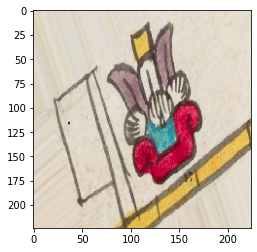

In [ ]:
img, x = load_image("/content/drive/MyDrive/Aztec Glyphs Image Data Set/Augmented images/Acapan20r.jpeg_0_4417.png")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [ ]:
predictions = base_models.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

49152/35363 [=========================================] - 0s 0us/step
predicted window_screen with probability 0.352
predicted fire_screen with probability 0.119
predicted shower_curtain with probability 0.110
predicted spider_web with probability 0.052
predicted envelope with probability 0.051


In [ ]:
base_models.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
feat_extractor = Model(inputs=base_models.input, outputs=base_models.get_layer("reshape_2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 4,253,864
Trainable params: 4,231,976
Non-trainable params: 21,888
_________________________________________________________________


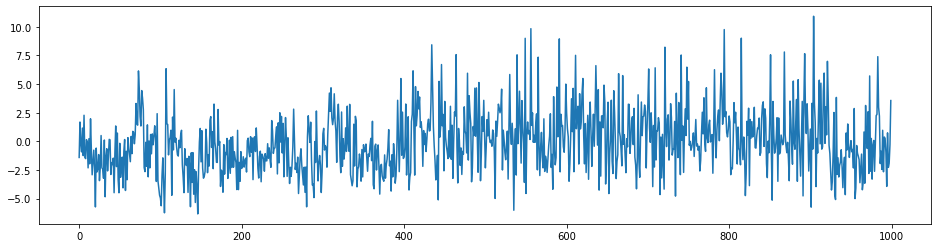

In [ ]:
img, x = load_image("/content/drive/MyDrive/Aztec Glyphs Image Data Set/Augmented images/Acapan20r.jpeg_0_4417.png")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [ ]:
images_path = '/content/drive/MyDrive/Aztec Glyphs Image Data Set/Augmented images'
image_extensions = ['.jpg', '.png', '.jpeg']   
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 6473 images to analyze


In [ ]:
import time
tic = time.clock()
features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

In [ ]:
from scipy.spatial import distance

def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(features[query_image_idx], feat) for feat in features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

[4467, 1027, 4470, 1029, 1026]
Names of the similar images:-
tlacotl5vosiertwig(SIMPLEX)FromTlacopan5v.jpg_0_991.png
Tlacopan5vSIMPLEX.jpg_0_673.png
tlacotl5vosiertwig(SIMPLEX)FromTlacopan5v.jpg_0_5611.png
Tlacopan5vSIMPLEX.jpg_0_6465.png
Tlacopan5vSIMPLEX.jpg_0_4512.png


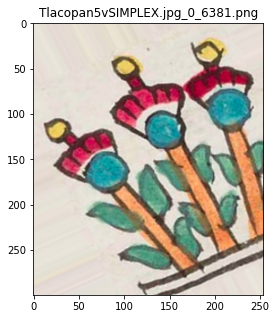

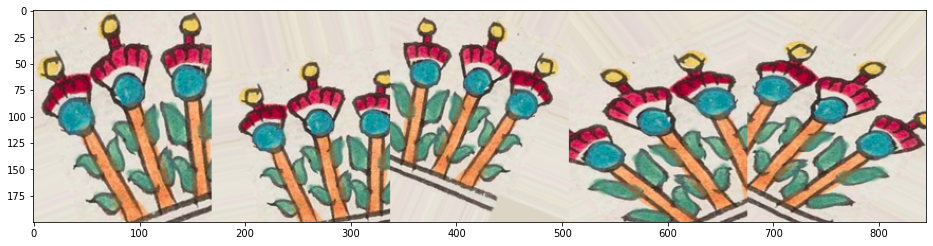

In [ ]:
query_image_idx = 1030
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print(idx_closest)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
cilin12rsmallshellsSIMPLEXfwithCilan.jpeg_0_5056.png
cilin12rsmallshellsSIMPLEXfwithCilan.jpeg_0_3795.png
Cillan12rSIMPLEX.jpeg_0_2494.png
Cillan12rSIMPLEX.jpeg_0_577.png
cilin12rsmallshellsSIMPLEXfwithCilan.jpeg_0_9141.png


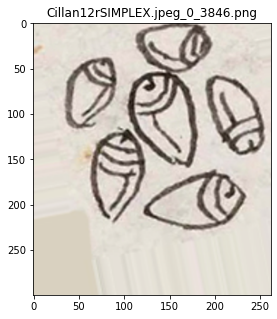

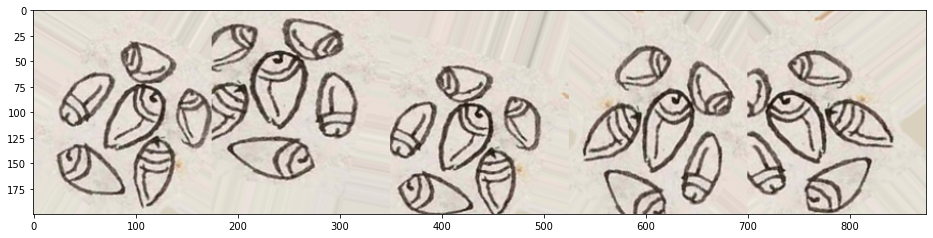

In [ ]:
query_image_idx = 1005
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
apantli06rwaterchannelFromHuitzitzilapan.jpg_0_5180.png
apantli06rwaterchannelFromHuitzitzilapan.jpg_0_8111.png
apantli06rwaterchannelFromHuitzitzilapan.jpg_0_6837.png
apantli06rwaterchannelFromHuitzitzilapan.jpg_0_7586.png
apantli07vwaterchannelFromTotolapan.jpg_0_5449.png


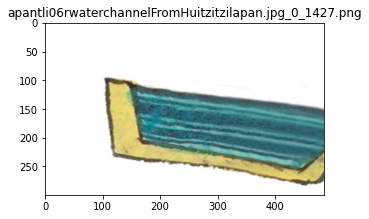

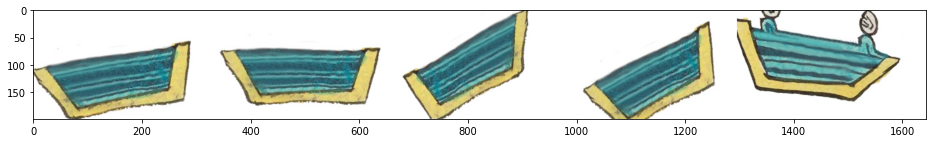

In [ ]:
query_image_idx = 1200
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
tonatiuh34rSIMPLEXsunFromTonatiuhco.png_0_107.png
Tonatiuhco34rSIMPLEX.jpeg_0_7174.png
tonatiuh34rSIMPLEXsunFromTonatiuhco.png_0_6908.png
tonatiuh34rSIMPLEXsunFromTonatiuhco.png_0_8296.png
Tonatiuhco34rSIMPLEX.jpeg_0_3727.png


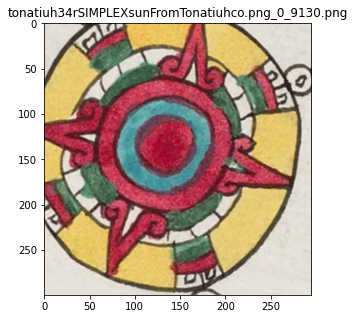

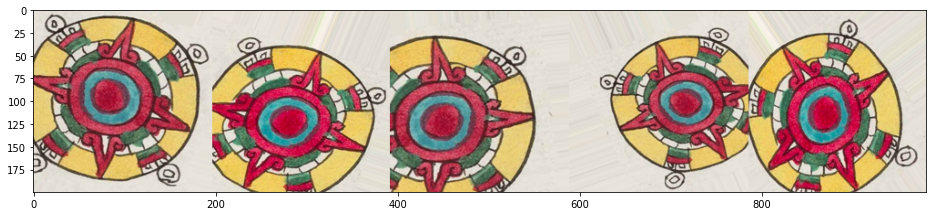

In [ ]:
import random
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
xocotl27rhogplumtreeFromAxocopan.jpg_0_7230.png
xocotl27rhogplumtreeFromAxocopan.jpg_0_1009.png
xocotl8rhogplumtreeFromAxocopan.png_0_3086.png
tzapotl48rzapotetreeFromTeuhcoltzapotlan.png_0_6282.png
tzapotl48rtypeoftreeFromTeuhzoltzapotlan.jpg_0_5073.png


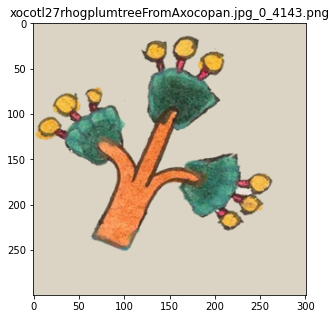

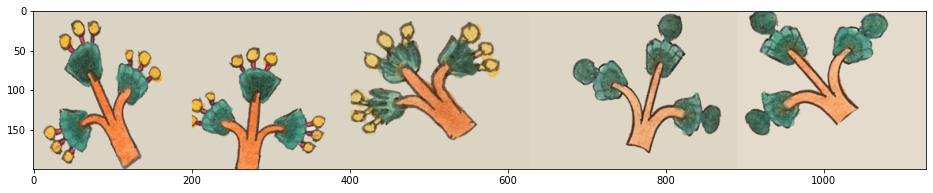

In [ ]:
import random
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
Coatepec34r.jpeg_0_9964.png
Coatepec32r.jpeg_0_7627.png
Coatepec34r.jpeg_0_6071.png
Zinacantepec10r.jpeg_0_1180.png
Icpatepec15v.jpeg_0_7063.png


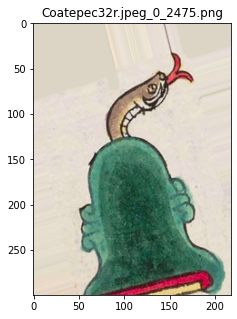

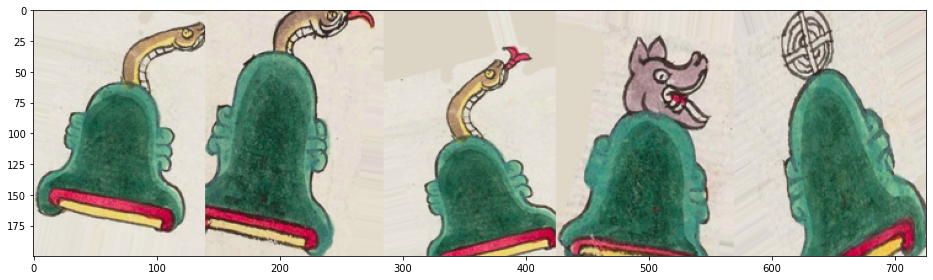

In [ ]:
import random
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
tecpan32rpalaceSIMPLEXforTecpan.jpeg_0_3556.png
Tecpan32rSIMPLEX.jpeg_0_6705.png
tecpan32rpalaceSIMPLEXforTecpan.jpeg_0_3728.png
tecpan32rpalaceSIMPLEXforTecpan.jpeg_0_995.png
Tecpan32rSIMPLEX.jpeg_0_4477.png


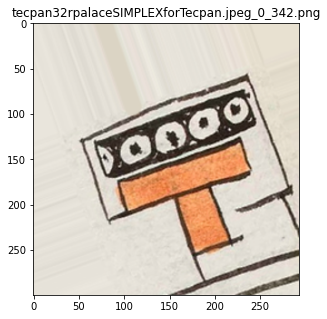

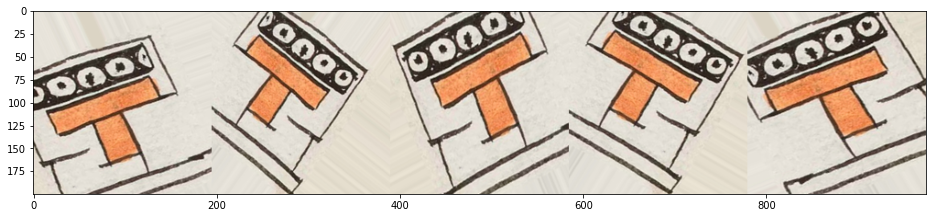

In [ ]:
import random
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))

plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
tehuitztli24vPointedStoneSIMPLEXForTehuitzco.jpeg_0_2349.png
tehuitztli24vPointedStoneSIMPLEXForTehuitzco.jpeg_0_170.png
tehuitztli24vPointedStoneSIMPLEXForTehuitzco.jpeg_0_6871.png
Tehuitzco24v.jpeg_0_617.png
Tehuitzco24vSIMPLEX.jpeg_0_3250.png


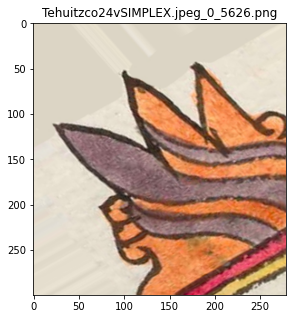

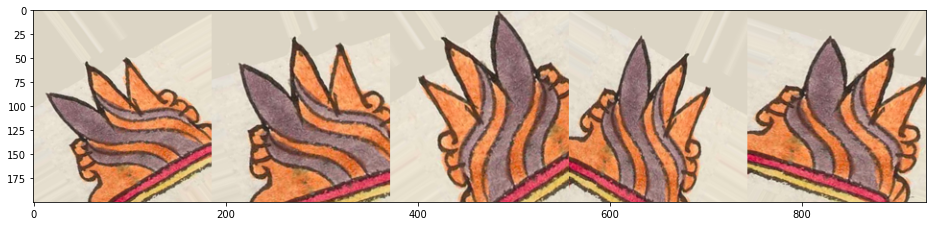

In [ ]:
import random
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))

plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])